In [1]:
# 导入必要的库
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
import os

In [2]:
data_orig = pd.read_csv('default_of_credit_card_clients.csv',encoding = 'utf-8')

In [3]:
data_orig

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
# Before modification
print("EDUCATION Before grouping:")
print(data_orig['EDUCATION'].unique())

# Group 5, 6, and 0 into a single class 4
data_orig['EDUCATION'] = np.where((data_orig['EDUCATION'] == 5) | (data_orig['EDUCATION'] == 6) | (data_orig['EDUCATION'] == 0), 4, data_orig['EDUCATION'])

# After modification
print("\nEDUCATION After grouping:")
print(data_orig['EDUCATION'].unique())

EDUCATION Before grouping:
[2 1 3 5 4 6 0]

EDUCATION After grouping:
[2 1 3 4]


In [5]:
print("MARRIAGE Before grouping:")
print(data_orig['MARRIAGE'].unique())

data_orig['MARRIAGE']=np.where(data_orig['MARRIAGE'] == 0, 3, data_orig['MARRIAGE'])

print("\MARRIAGE After grouping:")
print(data_orig['MARRIAGE'].unique())

MARRIAGE Before grouping:
[1 2 3 0]
\MARRIAGE After grouping:
[1 2 3]


In [6]:
data_orig

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [7]:
# 使用 get_dummies 进行 One-Hot 处理
one_hot_encoded_sex = pd.get_dummies(data_orig['SEX'], prefix='SEX')
# 将新的 One-Hot 编码列与原始 DataFrame 连接
df = pd.concat([data_orig, one_hot_encoded_sex], axis=1)

In [8]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_1,SEX_2
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,0,1
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,1
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,1
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,1,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,0,1837,3526,8998,129,0,0,0,1,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,19357,0,0,22000,4200,2000,3100,1,1,0
29998,29999,80000,1,3,1,41,1,-1,0,0,...,48944,85900,3409,1178,1926,52964,1804,1,1,0


In [9]:
# 使用 get_dummies 进行 One-Hot 处理
one_hot_encoded_edu = pd.get_dummies(df['EDUCATION'], prefix='EDUCATION')
# 将新的 One-Hot 编码列与原始 DataFrame 连接
df = pd.concat([df, one_hot_encoded_edu], axis=1)

In [10]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,0,1,0,1,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,0,1,0,1,0,0
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,0,1,0,1,0,0
3,4,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,0,1,0,1,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,3047,5000,1000,0,1,0,0,0,1,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,129,0,0,0,1,0,0,0,1,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,4200,2000,3100,1,1,0,0,1,0,0
29998,29999,80000,1,3,1,41,1,-1,0,0,...,1926,52964,1804,1,1,0,0,0,1,0


In [11]:
# 使用 get_dummies 进行 One-Hot 处理
one_hot_encoded_mag = pd.get_dummies(df['MARRIAGE'], prefix='MARRIAGE')
# 将新的 One-Hot 编码列与原始 DataFrame 连接
df = pd.concat([df, one_hot_encoded_mag], axis=1)

In [12]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,default payment next month,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,2,2,1,24,2,2,-1,-1,...,1,0,1,0,1,0,0,1,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,1,0,1,0,1,0,0,0,1,0
2,3,90000,2,2,2,34,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,4,50000,2,2,1,37,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,0,1,0,0,0,1,0,0,1,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,1,1,0,0,1,0,0,0,1,0
29998,29999,80000,1,3,1,41,1,-1,0,0,...,1,1,0,0,0,1,0,1,0,0


In [13]:
data_orig = df

In [14]:
# 分割数据集为特征和目标变量
target_column = 'default payment next month'
X = data_orig.drop(target_column, axis=1)  #del label
X = X.drop('ID', axis=1)  #del ID
X = X.drop('SEX', axis=1)  #del SEX,EDUCATION
X = X.drop('EDUCATION', axis=1) 
X = X.drop('MARRIAGE', axis=1) 
y = data_orig[target_column]   #def label

In [15]:
X

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,0,1,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,2000,0,1,0,1,0,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,5000,0,1,0,1,0,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,1000,0,1,0,1,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,679,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,...,1000,1,0,0,0,1,0,1,0,0
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,0,1,0,0,0,1,0,0,1,0
29997,30000,37,4,3,2,-1,0,0,3565,3356,...,3100,1,0,0,1,0,0,0,1,0
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,...,1804,1,0,0,0,1,0,1,0,0


In [16]:
print(X.describe())

            LIMIT_BAL           AGE         PAY_0         PAY_2         PAY_3  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667     35.485500     -0.016700     -0.133767     -0.166200   
std     129747.661567      9.217904      1.123802      1.197186      1.196868   
min      10000.000000     21.000000     -2.000000     -2.000000     -2.000000   
25%      50000.000000     28.000000     -1.000000     -1.000000     -1.000000   
50%     140000.000000     34.000000      0.000000      0.000000      0.000000   
75%     240000.000000     41.000000      0.000000      0.000000      0.000000   
max    1000000.000000     79.000000      8.000000      8.000000      8.000000   

              PAY_4         PAY_5         PAY_6      BILL_AMT1      BILL_AMT2  \
count  30000.000000  30000.000000  30000.000000   30000.000000   30000.000000   
mean      -0.220667     -0.266200     -0.291100   51223.330900   49179.075167   
std        1.169139      1.

In [17]:
# 计算特征之间的协方差矩阵
covariance_matrix = X.cov()
# 打印协方差矩阵
print("\nCovariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
                LIMIT_BAL            AGE         PAY_0         PAY_2  \
LIMIT_BAL    1.683446e+10  173076.722569 -39545.930009 -46037.648360   
AGE          1.730767e+05      84.969755     -0.408639     -0.553408   
PAY_0       -3.954593e+04      -0.408639      1.262930      0.904330   
PAY_2       -4.603765e+04      -0.553408      0.904330      1.433254   
PAY_3       -4.443225e+04      -0.585263      0.772384      1.098371   
PAY_4       -4.057181e+04      -0.535851      0.707972      0.926680   
PAY_5       -3.667056e+04      -0.562245      0.648743      0.844886   
PAY_6       -3.509308e+04      -0.517022      0.613292      0.792320   
BILL_AMT1    2.727020e+09   38172.933546  15480.304170  20706.614217   
BILL_AMT2    2.570130e+09   35613.657962  15185.916919  20045.829482   
BILL_AMT3    2.548533e+09   34334.251320  14011.556537  18609.510991   
BILL_AMT4    2.453926e+09   30453.108180  12950.248389  17116.298983   
BILL_AMT5    2.331481e+09   27654.067800  12

In [ ]:
# 使用 Seaborn 绘制直方图和核密度估计图
plt.figure(figsize=(12, 8))
# 数据分布可视化
for feature in X.columns:
    sns.histplot(data_orig, x=feature, hue=target_column, multiple="stack", kde=True, bins=30, edgecolor='w')
plt.title('Feature Distribution by Target')
plt.show()

In [ ]:
# 特征之间的关系可视化
plt.figure(figsize=(12, 8))
sns.pairplot(data_orig , hue=target_column)
plt.title('Pairplot of Features by Target')
plt.show()

In [ ]:


# 可视化特征之间的关系
plt.figure(figsize=(12, 8))
pairplot = sns.pairplot(data_orig, hue=target_column)
pairplot.fig.suptitle('Pairplot of Features by Target', y=1.02)  # 设置标题位置

# 保存图形为图像文件
output_directory = 'output_plots'
os.makedirs(output_directory, exist_ok=True)  # 创建输出目录，如果不存在
pairplot.savefig(os.path.join(output_directory, 'pairplot.png'))

# 不同类别之间的箱线图
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(x=target_column, y='LIMIT_BAL', data=data_orig)  # 替换 'LIMIT_BAL' 为实际的特征
boxplot.set_title('Boxplot by Target')

# 保存箱线图为图像文件
boxplot.figure.savefig(os.path.join(output_directory, 'boxplot.png'))

# 显示图形
plt.show()


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
smote = SMOTE(random_state=33)
X_train, y_train = smote.fit_resample(X_train, y_train)  #new data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# 构建机器学习模型
rf_model = RandomForestClassifier(random_state=33)
svm_model = SVC(probability=True,random_state=33)
logistic_model = LogisticRegression(random_state=33)
# 梯度提升树模型
gb_model = GradientBoostingClassifier(random_state=33)
# 训练模型
rf_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)
logistic_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)

D:\software\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier(random_state=33)

In [33]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# 构建机器学习模型 ，无缩放
rf_model_un = RandomForestClassifier(random_state=33)
svm_model_un = SVC(probability=True,random_state=33)
logistic_model_un = LogisticRegression(random_state=33)
# 梯度提升树模型
gb_model_un = GradientBoostingClassifier(random_state=33)
# 训练模型
rf_model_un.fit(X_train, y_train)
svm_model_un.fit(X_train, y_train)
logistic_model_un.fit(X_train, y_train)
gb_model_un.fit(X_train, y_train)

D:\software\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier(random_state=33)

In [21]:
# 预测测试集，有缩放
rf_predictions = rf_model.predict(X_test_scaled)
svm_predictions = svm_model.predict(X_test_scaled)
logistic_predictions = logistic_model.predict(X_test_scaled)
# 预测测试集
gb_predictions = gb_model.predict(X_test_scaled)

In [35]:
# 预测测试集,无缩放
rf_predictions_un = rf_model_un.predict(X_test)
svm_predictions_un = svm_model_un.predict(X_test)
logistic_predictions_un = logistic_model_un.predict(X_test)
# 预测测试集
gb_predictions_un = gb_model_un.predict(X_test)

In [22]:
# 评估模型性能
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")
print(f"Logistic Regression Accuracy: {logistic_accuracy}")

Random Forest Accuracy: 0.808
SVM Accuracy: 0.8191666666666667
Logistic Regression Accuracy: 0.817


In [23]:
gb_accuracy = accuracy_score(y_test, gb_predictions)

In [24]:
gb_accuracy

0.8198333333333333

In [25]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4678
           1       0.59      0.42      0.49      1322

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.79      0.81      0.80      6000



In [26]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4678
           1       0.66      0.37      0.48      1322

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [27]:
print(classification_report(y_test, logistic_predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4678
           1       0.67      0.34      0.45      1322

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [28]:
print(classification_report(y_test, gb_predictions))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4678
           1       0.65      0.40      0.50      1322

    accuracy                           0.82      6000
   macro avg       0.75      0.67      0.69      6000
weighted avg       0.80      0.82      0.80      6000



In [29]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [30]:
# 精确率
p = precision_score(y_test, rf_predictions)
# 召回率
r = recall_score(y_test, rf_predictions)
# f1-score
f1 = f1_score(y_test, rf_predictions)
print(p, r, f1) 

0.5904255319148937 0.4198184568835098 0.49071618037135273


In [ ]:
# 精确率
p = precision_score(y_test, svm_predictions)
# 召回率
r = recall_score(y_test, svm_predictions)
# f1-score
f1 = f1_score(y_test, svm_predictions)
print(p, r, f1) 

In [31]:
# 精确率
p = precision_score(y_test, logistic_predictions)
# 召回率
r = recall_score(y_test, logistic_predictions)
# f1-score
f1 = f1_score(y_test,logistic_predictions)
print(p, r, f1) 

0.6686746987951807 0.3358547655068079 0.44712990936555885


In [32]:
# 精确率
p = precision_score(y_test, gb_predictions)
# 召回率
r = recall_score(y_test, gb_predictions)
# f1-score
f1 = f1_score(y_test,gb_predictions)
print(p, r, f1) 

0.6467722289890377 0.4016641452344932 0.4955669622025198


In [36]:
# 评估模型性能，无缩放
rf_accuracy_un = accuracy_score(y_test, rf_predictions_un)
svm_accuracy_un = accuracy_score(y_test, svm_predictions_un)
logistic_accuracy_un = accuracy_score(y_test, logistic_predictions_un)
gb_accuracy_un = accuracy_score(y_test, gb_predictions_un)
print(f"Random Forest Accuracy: {rf_accuracy_un}")
print(f"SVM Accuracy: {svm_accuracy_un}")
print(f"Logistic Regression Accuracy: {logistic_accuracy_un}")
print(f"gb Accuracy: {gb_accuracy_un}")

Random Forest Accuracy: 0.8081666666666667
SVM Accuracy: 0.584
Logistic Regression Accuracy: 0.6863333333333334
gb Accuracy: 0.8198333333333333


In [37]:
# 精确率
p = precision_score(y_test, rf_predictions_un)
# 召回率
r = recall_score(y_test, rf_predictions_un)
# f1-score
f1 = f1_score(y_test, rf_predictions_un)
print(p, r, f1) 

0.5908607863974495 0.4205748865355522 0.4913831197525408


In [38]:
# 精确率
p = precision_score(y_test,svm_predictions_un)
# 召回率
r = recall_score(y_test, svm_predictions_un)
# f1-score
f1 = f1_score(y_test, svm_predictions_un)
print(p, r, f1) 

0.30101694915254235 0.6717095310136157 0.41573033707865165


In [39]:
# 精确率
p = precision_score(y_test, logistic_predictions_un)
# 召回率
r = recall_score(y_test,logistic_predictions_un)
# f1-score
f1 = f1_score(y_test, logistic_predictions_un)
print(p, r, f1) 

0.3347107438016529 0.4288956127080182 0.3759946949602122


In [40]:
# 精确率
p = precision_score(y_test,  gb_predictions_un)
# 召回率
r = recall_score(y_test,  gb_predictions_un)
# f1-score
f1 = f1_score(y_test, gb_predictions_un)
print(p, r, f1) 

0.6467722289890377 0.4016641452344932 0.4955669622025198


In [44]:
# ROC 和 AUC
def plot_roc_curve(model, X, y, label):
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

D:\software\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


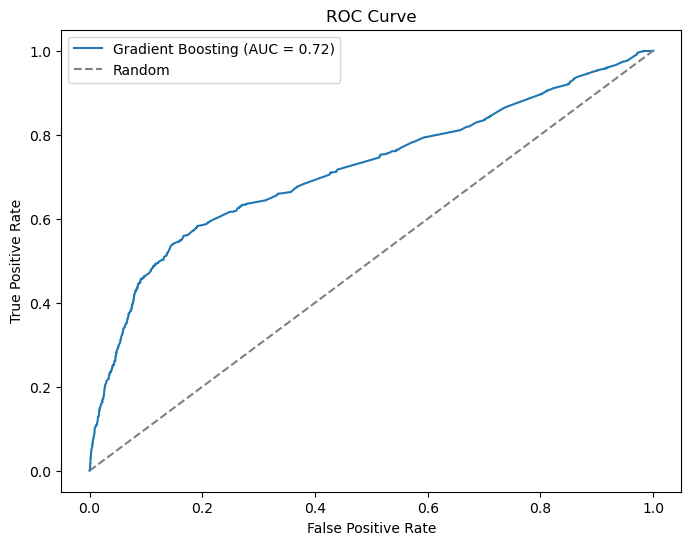

In [45]:
# 评估模型性能
#gb_accuracy_un = accuracy_score(y_test, gb_prediction)
# gb ROC Curve
plot_roc_curve(gb_model_un, X_test_scaled, y_test, 'Gradient Boosting')

D:\software\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


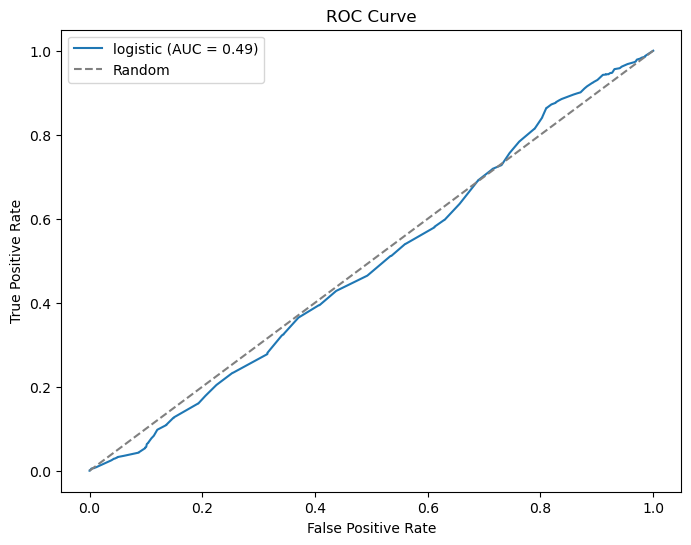

In [48]:
plot_roc_curve(rf_model_un, X_test_scaled, y_test, 'logistic')

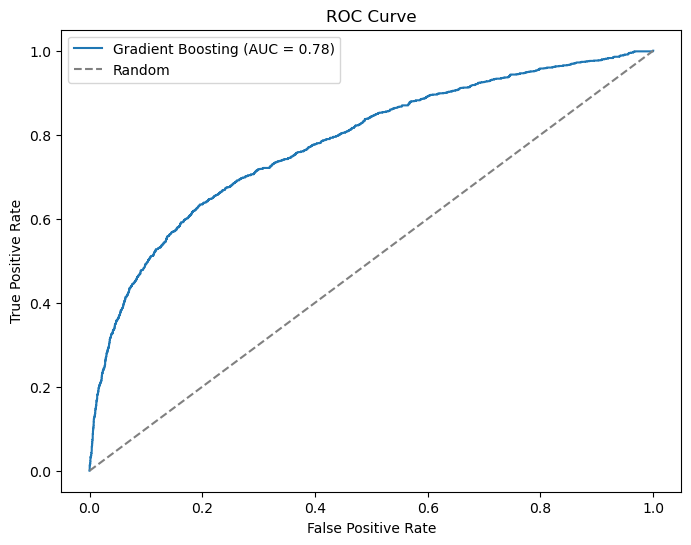

In [23]:

# 评估模型性能
gb_accuracy = accuracy_score(y_test, gb_predictions)
# gb ROC Curve
plot_roc_curve(gb_model, X_test_scaled, y_test, 'Gradient Boosting')

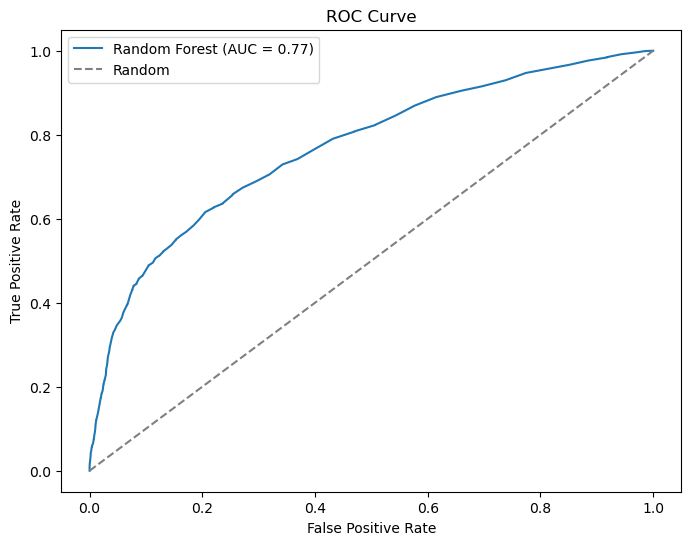

In [24]:

# Random Forest ROC Curve
plot_roc_curve(rf_model, X_test_scaled, y_test, 'Random Forest')


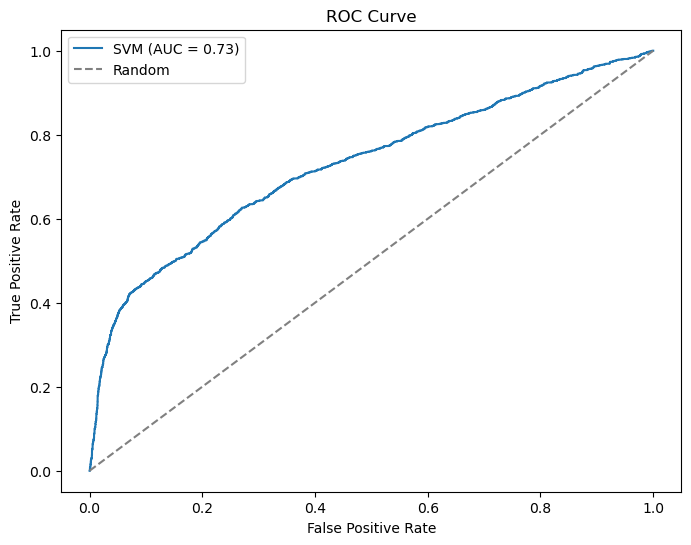

In [25]:
# SVM ROC Curve
plot_roc_curve(svm_model, X_test_scaled, y_test, 'SVM')

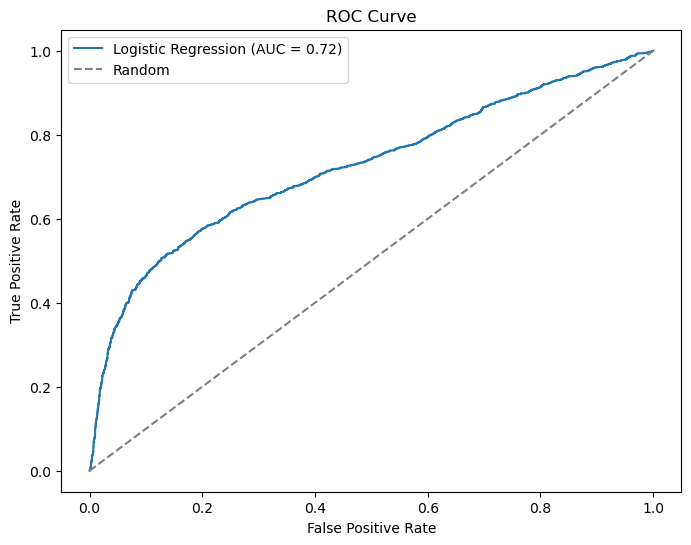

In [26]:
# Logistic Regression ROC Curve
plot_roc_curve(logistic_model, X_test_scaled, y_test, 'Logistic Regression')

In [ ]:
# 5 折交叉验证
cv_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

In [ ]:
# 5 折交叉验证
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

In [ ]:
# 5 折交叉验证
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
# 调参策略 - Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=33),
                               param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

rf_grid_search.fit(X_train_scaled, y_train)
best_rf_model = rf_grid_search.best_estimator_

print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best Random Forest Accuracy:", rf_grid_search.best_score_)

In [34]:
# 调参策略 - SVM
svm_param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(SVC(random_state=33, probability=True),
                                param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train_scaled, y_train)
best_svm_model = svm_grid_search.best_estimator_

print("Best SVM Parameters:", svm_grid_search.best_params_)
print("Best SVM Accuracy:", svm_grid_search.best_score_)

NameError: name 'GridSearchCV' is not defined

In [ ]:
# 调参策略 - Logistic Regression
logistic_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

logistic_grid_search = GridSearchCV(LogisticRegression(random_state=33),
                                     param_grid=logistic_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

logistic_grid_search.fit(X_train_scaled, y_train)
best_logistic_model = logistic_grid_search.best_estimator_

print("Best Logistic Regression Parameters:", logistic_grid_search.best_params_)
print("Best Logistic Regression Accuracy:", logistic_grid_search.best_score_)

In [ ]:
# 调参策略 - Random Forest
rf_param_search = {
    'n_estimators': (50, 200),
    'max_depth': (1, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

rf_bayes_search = BayesSearchCV(RandomForestClassifier(random_state=33),
                                 search_spaces=rf_param_search, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1)

rf_bayes_search.fit(X_train_scaled, y_train)
best_rf_model = rf_bayes_search.best_estimator_

print("Best Random Forest Parameters:", rf_bayes_search.best_params_)
print("Best Random Forest Accuracy:", rf_bayes_search.best_score_)

In [ ]:
# 调参策略 - SVM
svm_param_search = {
    'C': (0.1, 2),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_bayes_search = BayesSearchCV(SVC(random_state=33, probability=True),
                                  search_spaces=svm_param_search, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1)

svm_bayes_search.fit(X_train_scaled, y_train)
best_svm_model = svm_bayes_search.best_estimator_

print("Best SVM Parameters:", svm_bayes_search.best_params_)
print("Best SVM Accuracy:", svm_bayes_search.best_score_)

In [ ]:
# 调参策略 - Logistic Regression
logistic_param_search = {
    'C': (0.001, 100),
    'penalty': ['l1', 'l2']
}

logistic_bayes_search = BayesSearchCV(LogisticRegression(random_state=42),
                                       search_spaces=logistic_param_search, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1)

logistic_bayes_search.fit(X_train_scaled, y_train)
best_logistic_model = logistic_bayes_search.best_estimator_

print("Best Logistic Regression Parameters:", logistic_bayes_search.best_params_)
print("Best Logistic Regression Accuracy:", logistic_bayes_search.best_score_)

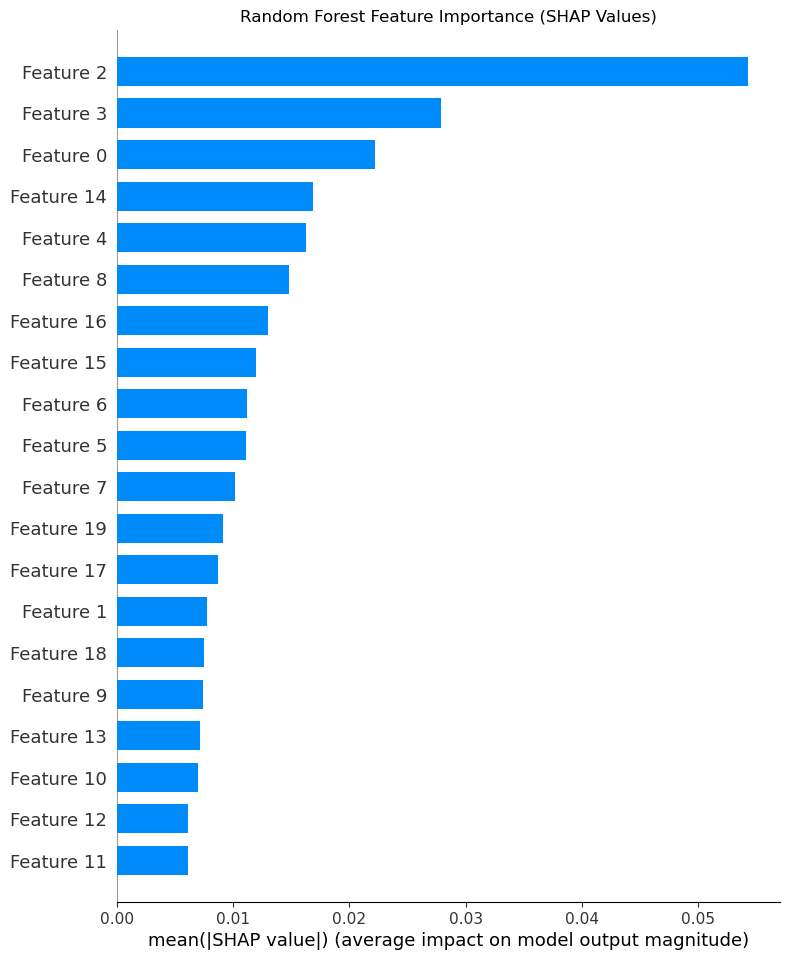

In [19]:
import shap
# 创建一个 SHAP 解释器
explainer = shap.TreeExplainer(rf_model)

# 计算 SHAP 值
shap_values = explainer.shap_values(X_test_scaled)

# 汇总 SHAP 值，得到特征重要性
shap.summary_plot(shap_values[1], X_test_scaled, plot_type="bar", show=False)  # 使用第一个类别的 SHAP 值
plt.title("Random Forest Feature Importance (SHAP Values)")
plt.show()

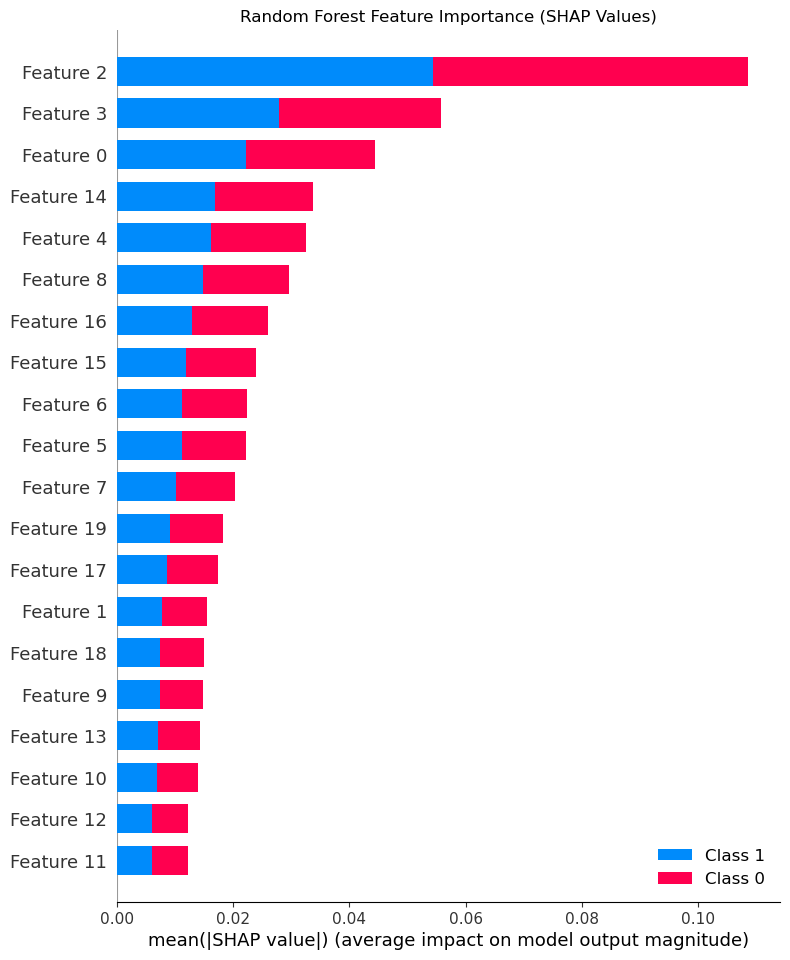

In [33]:
import shap
# 创建一个 SHAP 解释器
explainer = shap.TreeExplainer(rf_model)

# 计算 SHAP 值
shap_values = explainer.shap_values(X_test_scaled)

# 汇总 SHAP 值，得到特征重要性
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", show=False)  # 使用第一个类别的 SHAP 值
plt.title("Random Forest Feature Importance (SHAP Values)")
plt.show()

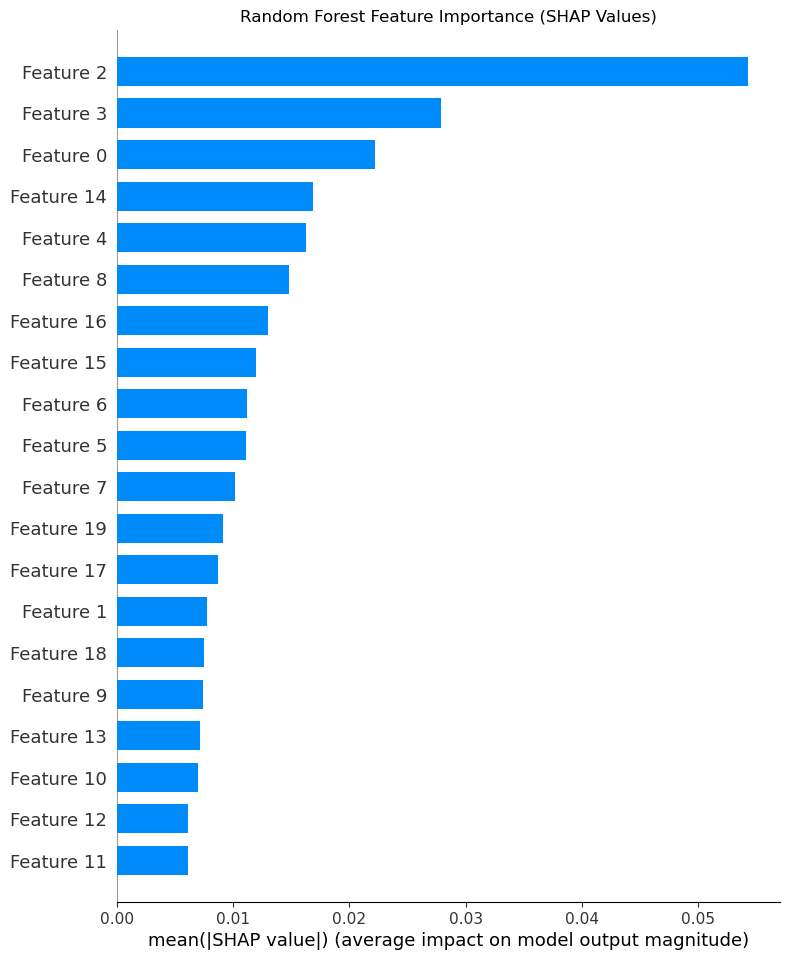

In [21]:
# 汇总 SHAP 值，得到特征重要性
shap.summary_plot(shap_values[0], X_test_scaled, plot_type="bar", show=False)  # 使用第二个类别的 SHAP 值
plt.title("Random Forest Feature Importance (SHAP Values)")
plt.show()

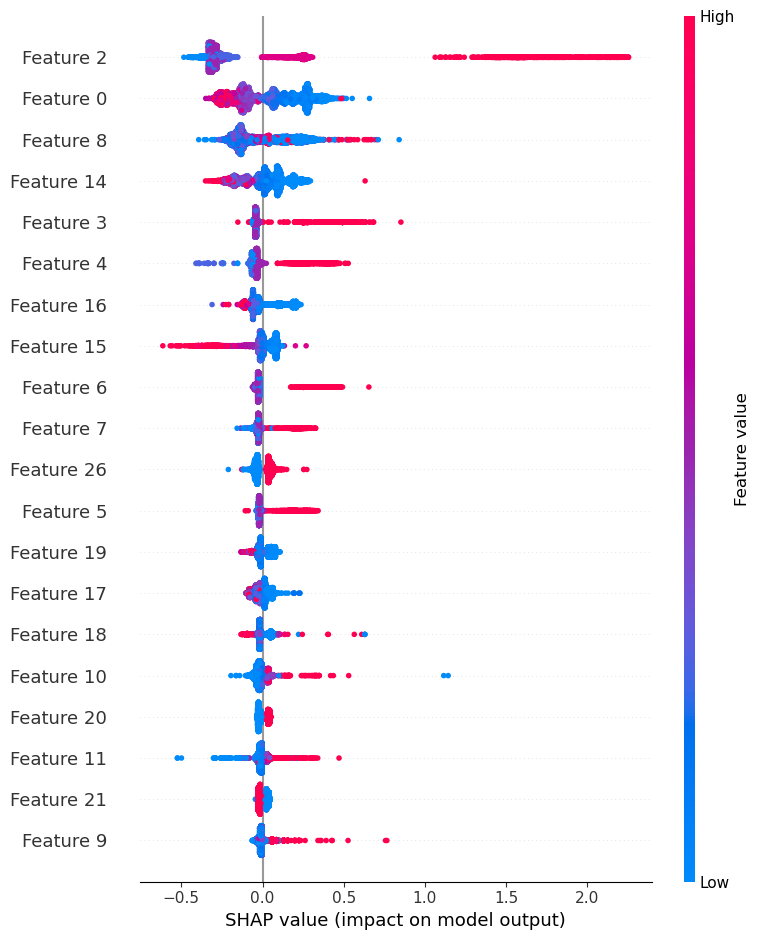

In [29]:
#使用TreeExplainer解释模型
explainer = shap.TreeExplainer(gb_model)
# 获取测试集的SHAP值
shap_values_gb = explainer.shap_values(X_test_scaled)

# 使用force_plot可视化单个样本的SHAP值
shap.force_plot(explainer.expected_value, shap_values_gb[0, :], X_test_scaled[0, :])

# 使用summary_plot可视化特征重要性
shap.summary_plot(shap_values_gb,X_test_scaled)

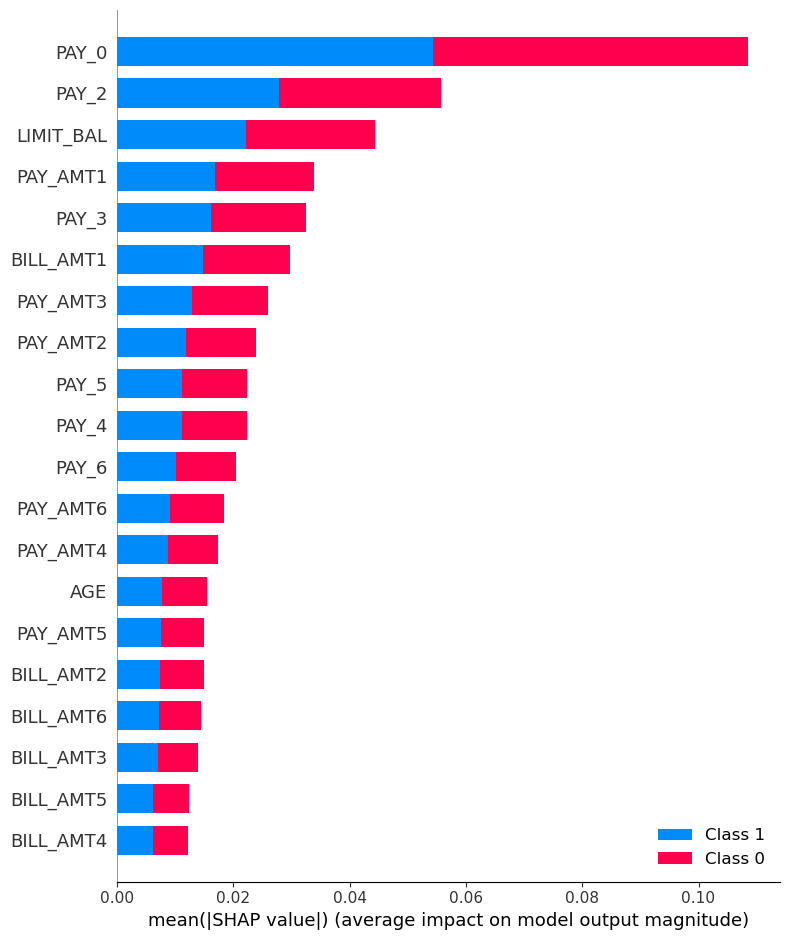

In [31]:
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
#

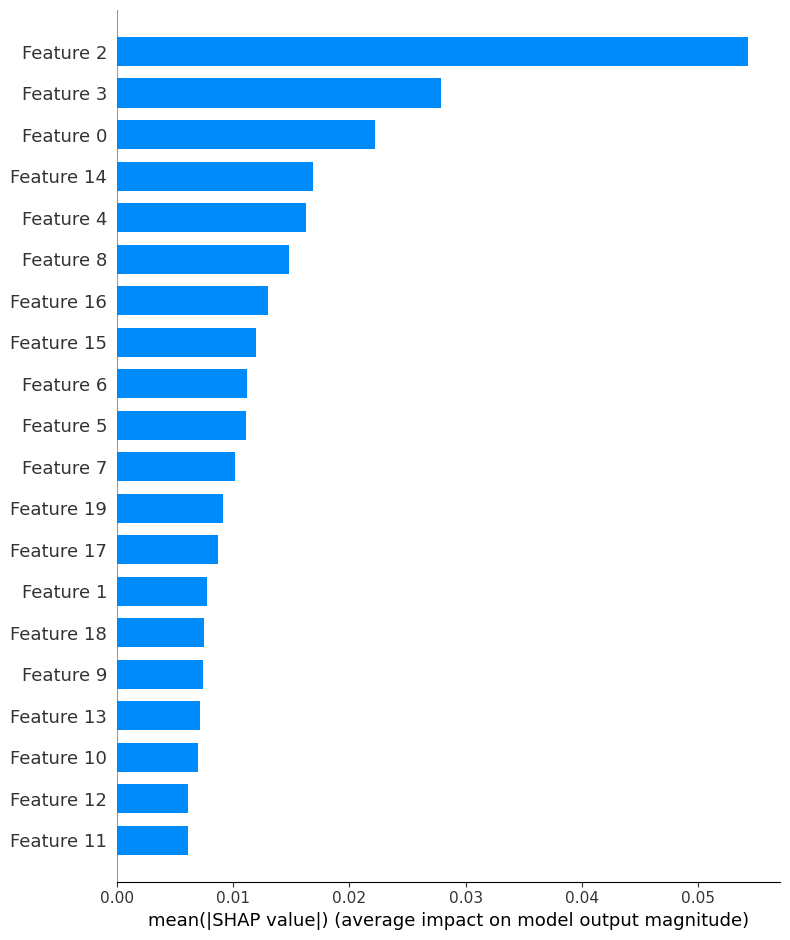

In [32]:
shap.summary_plot(shap_values[0], X_test_scaled, plot_type="bar", show=False)